In [1]:
import seaborn as sns
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import six

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline

import anchor
modality_to_color = anchor.MODALITY_TO_COLOR.copy()
modality_to_color['constitutive'] = '#262626'
modality_order = ['excluded', 'bimodal', 'included', 'constitutive']
modality_palette = [modality_to_color[m] for m in modality_order]
modality_palette



import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

import pybedtools

folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)
bed_folder = '{}/bed'.format(folder)



splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-02-23 11:43:37	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-02-23 11:43:37	Parsing datapackage to create a Study object
2016-02-23 11:44:09	Initializing Study
2016-02-23 11:44:09	Initializing Predictor configuration manager for Study
2016-02-23 11:44:09	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-23 11:44:09	Added ExtraTreesClassifier to default predictors
2016-02-23 11:44:09	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-23 11:44:09	Added ExtraTreesRegressor to default predictors
2016-02-23 11:44:09	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-23 11:44:09	Added GradientBoostingClassifier to default predictors
2016-02-23 11:44:09	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [2]:
def make_phenotype_modality_format(constitutive_df):
    constitutive_df = constitutive_df.copy().reset_index()
    constitutive_df['modality'] = 'constitutive'
    dfs = []
    for phenotype in study.phenotype_order:
        df = constitutive_df.copy()#.reset_index()
        df['phenotype'] = phenotype
        dfs.append(df)
    df = pd.concat(dfs)
    six.print_(df.shape)
#     df.head()
    return df

In [3]:
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


In [4]:
figure_folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/gene_transcript_features'
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/gene_transcript_features': File exists


In [5]:
facet_kws = dict(col='phenotype', hue='modality', hue_order=modality_order, palette=modality_palette,
                 col_order=study.phenotype_order, size=2)


In [6]:
plot_kws = dict(x='phenotype', hue='modality', hue_order=modality_order, palette=modality_palette,
                 order=study.phenotype_order)

## Exon length


In [7]:
prefix = 'exon_length'
csv = '{}.csv'.format(prefix)

In [8]:
constitutive_exon_lengths = pd.read_csv('{}/{}'.format(constitutive_feature_folder, csv), 
                                          index_col=0, header=None, squeeze=True)
constitutive_exon_lengths.name = 'exon2_length'
constitutive_exon_lengths.index.name = 'event_id'
constitutive_exon_lengths.head()

event_id
exon:chr1:1341189-1341266:-      78
exon:chr1:1341189-1342399:-    1211
exon:chr1:1653035-1653150:-     116
exon:chr1:1650767-1650894:-     128
exon:chr1:1650797-1650894:-      98
Name: exon2_length, dtype: int64

In [9]:
constitutive_exon_lengths_modalities = make_phenotype_modality_format(constitutive_exon_lengths)
constitutive_exon_lengths_modalities.head()

(18204, 4)


,event_id,exon2_length,modality,phenotype
0,exon:chr1:1341189-1341266:-,78,constitutive,iPSC
1,exon:chr1:1341189-1342399:-,1211,constitutive,iPSC
2,exon:chr1:1653035-1653150:-,116,constitutive,iPSC
3,exon:chr1:1650767-1650894:-,128,constitutive,iPSC
4,exon:chr1:1650797-1650894:-,98,constitutive,iPSC


In [10]:
col = 'exon2_length'
modality_exon_lengths = study.supplemental.modalities_tidy.join(study.splicing.feature_data[col], on='event_id')
modality_exon_lengths = pd.concat([modality_exon_lengths, constitutive_exon_lengths_modalities])
modality_exon_lengths.head()

,event_id,exon2_length,modality,phenotype
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,233,included,MN
1,exon:chr10:102286732-102286831:-@exon:chr10:10...,156,included,MN
2,exon:chr10:103360960-103361093:+@exon:chr10:10...,73,bimodal,MN
3,exon:chr10:103563492-103563776:-@exon:chr10:10...,159,bimodal,MN
4,exon:chr10:103567487-103567658:-@exon:chr10:10...,99,included,MN


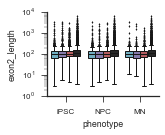

In [11]:
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.yscale('log')
sns.boxplot(data=modality_exon_lengths, y=col, linewidth=1, fliersize=2, **plot_kws)
ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
sns.despine()
fig.savefig('{}/{}_boxplots.pdf'.format(figure_folder, prefix))

In [12]:
from flotilla.visualize.generic import cdfplot

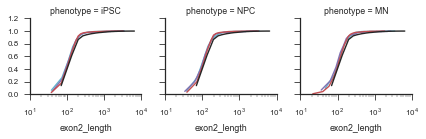

In [13]:
g = sns.FacetGrid(modality_exon_lengths, **facet_kws)
plt.xscale('log')
g.map(cdfplot, col)

Easier to see difference in boxplots .. sticking to boxplots

In [14]:
from scipy.stats.mstats import kruskalwallis

for phenotype, phenotype_df in modality_exon_lengths.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
    constitutive = grouped.get_group('constitutive')
    
    for modality, modality_df in grouped:
        if modality == 'constitutive':
            continue
        six.print_('\t', modality)

        result = kruskalwallis(modality_df[col], constitutive[col])
        six.print_('\t\t', result)

MN
	 ambivalent
		 KruskalResult(statistic=2.604768308719843, pvalue=0.10654272727410843)
	 bimodal
		 KruskalResult(statistic=38.216578520276208, pvalue=6.3312221954141329e-10)
	 excluded
		 KruskalResult(statistic=32.803969923466958, pvalue=1.0193645129905472e-08)
	 included
		 KruskalResult(statistic=48.475493159519615, pvalue=3.3444228063046139e-12)
NPC
	 ambivalent
		 KruskalResult(statistic=3.8480815031613886, pvalue=0.049802926642246212)
	 bimodal
		 KruskalResult(statistic=55.082250746928004, pvalue=1.1559002435090268e-13)
	 excluded
		 KruskalResult(statistic=77.789538495382118, pvalue=1.1462565917721839e-18)
	 included
		 KruskalResult(statistic=76.79677960173008, pvalue=1.894863336588738e-18)
iPSC
	 ambivalent
		 KruskalResult(statistic=1.4132193424282899, pvalue=0.23452269844707541)
	 bimodal
		 KruskalResult(statistic=52.420290651690301, pvalue=4.4807042223243736e-13)
	 concurrent
		 KruskalResult(statistic=2.9508869135868934, pvalue=0.085830442204449464)
	 excluded
		 Kru

## Intron length

In [15]:
prefix = 'intron_length'
csv = '{}.csv'.format(prefix)

In [16]:
constitutive_intron_lengths = pd.read_csv('{}/{}'.format(constitutive_feature_folder, csv), 
                                          index_col=0, header=None, squeeze=True)
constitutive_intron_lengths.name = 'intron_length'
constitutive_intron_lengths.index.name = 'event_id'
constitutive_intron_lengths.head()

event_id
exon:chr10:102039881-102039985:-     5441.500000
exon:chr10:102040691-102040810:-     4245.500000
exon:chr10:102045854-102045970:-    11091.666667
exon:chr10:102045854-102046089:-    11227.666667
exon:chr10:102286732-102286831:-     4130.500000
Name: intron_length, dtype: float64

In [17]:
constitutive_intron_lengths_modalities = make_phenotype_modality_format(constitutive_intron_lengths)
constitutive_intron_lengths_modalities.head()

(18204, 4)


,event_id,intron_length,modality,phenotype
0,exon:chr10:102039881-102039985:-,5441.500000,constitutive,iPSC
1,exon:chr10:102040691-102040810:-,4245.500000,constitutive,iPSC
2,exon:chr10:102045854-102045970:-,11091.666667,constitutive,iPSC
3,exon:chr10:102045854-102046089:-,11227.666667,constitutive,iPSC
4,exon:chr10:102286732-102286831:-,4130.500000,constitutive,iPSC


In [18]:
col = 'intron_length'
log_col = '$\log_{10}$ Intron Length'
modality_introns = study.supplemental.modalities_tidy.join(study.splicing.feature_data[col], on='event_id')
modality_introns = pd.concat([modality_introns, constitutive_intron_lengths_modalities])
modality_introns[log_col] = np.log10(modality_introns[col])
modality_introns.head()

,event_id,intron_length,modality,phenotype,$\log_{10}$ Intron Length
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,6101,included,MN,3.785401
1,exon:chr10:102286732-102286831:-@exon:chr10:10...,3045,included,MN,3.483587
2,exon:chr10:103360960-103361093:+@exon:chr10:10...,7498,bimodal,MN,3.874945
3,exon:chr10:103563492-103563776:-@exon:chr10:10...,4279,bimodal,MN,3.631342
4,exon:chr10:103567487-103567658:-@exon:chr10:10...,3710,included,MN,3.569374


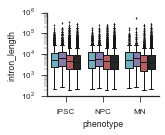

In [19]:
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.yscale('log')
sns.boxplot(data=modality_introns, y=col, linewidth=1, fliersize=2, **plot_kws)
ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
sns.despine()
fig.savefig('{}/{}_boxplot.pdf'.format(figure_folder, col))

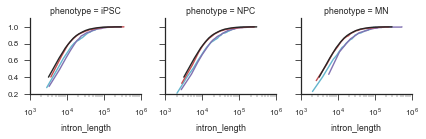

In [20]:
g = sns.FacetGrid(modality_introns, **facet_kws)
plt.xscale('log')
g.map(cdfplot, col)

In [21]:
from scipy.stats.mstats import kruskalwallis

for phenotype, phenotype_df in modality_introns.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
    constitutive = grouped.get_group('constitutive')
    
    for modality, modality_df in grouped:
        if modality == 'constitutive':
            continue
        six.print_('\t', modality)

        result = kruskalwallis(modality_df[log_col], constitutive[log_col])
        six.print_('\t\t', result)

MN
	 ambivalent
		 KruskalResult(statistic=1.7279647057356018, pvalue=0.18867103226487603)
	 bimodal
		 KruskalResult(statistic=45.004641418757849, pvalue=1.9656798789211187e-11)
	 excluded
		 KruskalResult(statistic=20.92607642717488, pvalue=4.7735208503268998e-06)
	 included
		 KruskalResult(statistic=0.88983391023004021, pvalue=0.34552232061842081)
NPC
	 ambivalent
		 KruskalResult(statistic=0.59750106086447197, pvalue=0.43953307610994341)
	 bimodal
		 KruskalResult(statistic=54.58803429047299, pvalue=1.4863790692553056e-13)
	 excluded
		 KruskalResult(statistic=47.0112310574305, pvalue=7.0581086921891812e-12)
	 included
		 KruskalResult(statistic=4.2917351640631285, pvalue=0.038298060930357224)
iPSC
	 ambivalent
		 KruskalResult(statistic=1.482311345452179, pvalue=0.22341324074319324)
	 bimodal
		 KruskalResult(statistic=113.1493916234291, pvalue=2.0011462410924264e-26)
	 concurrent
		 KruskalResult(statistic=0.081123762129892085, pvalue=0.77578026031447345)
	 excluded
		 KruskalRe

## Gene expression

In [22]:
study.splicing.feature_expression_id_col = 'ensembl_id'
splicing_tidy = study.tidy_splicing_with_expression.copy()
six.print_(splicing_tidy.shape)
singles_not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
splicing_tidy_singles = splicing_tidy.ix[splicing_tidy.sample_id.isin(singles_not_outliers)]
six.print_(splicing_tidy_singles.shape)
splicing_tidy_singles = splicing_tidy_singles.join(study.sample_id_to_phenotype, on='sample_id')

(1064136, 5)
(913092, 5)


In [23]:
splicing_tidy_singles.head()

,event_name,sample_id,psi,common_id,expression,phenotype
0,exon:chr10:101165513-101165617:-@exon:chr10:10...,CVN_01,1,ENSG00000120053,104.96955,NPC
1,exon:chr10:101165513-101165617:-@exon:chr10:10...,CVN_02,1,ENSG00000120053,78.60160,NPC
2,exon:chr10:101165513-101165617:-@exon:chr10:10...,CVN_03,1,ENSG00000120053,228.96400,NPC
3,exon:chr10:101165513-101165617:-@exon:chr10:10...,CVN_05,1,ENSG00000120053,294.41000,NPC
4,exon:chr10:101165513-101165617:-@exon:chr10:10...,CVN_07,1,ENSG00000120053,120.86590,NPC


In [24]:
constitutive_genes = pd.read_csv('{}/genes_expanded.csv'.format(constitutive_feature_folder), 
                                 header=None, index_col=0, squeeze=True)
constitutive_genes.name = 'common_id'
constitutive_genes.index.name = 'event_id'
constitutive_genes.head()

event_id
exon:chr10:102039881-102039985:-    ENSG00000196072
exon:chr10:102040691-102040810:-    ENSG00000196072
exon:chr10:102045854-102045970:-    ENSG00000196072
exon:chr10:102045854-102046089:-    ENSG00000196072
exon:chr10:102286732-102286831:-    ENSG00000075826
Name: common_id, dtype: object

In [25]:
constitutive_genes_modalities = make_phenotype_modality_format(constitutive_genes)
constitutive_genes_modalities.head()

(19398, 4)


,event_id,common_id,modality,phenotype
0,exon:chr10:102039881-102039985:-,ENSG00000196072,constitutive,iPSC
1,exon:chr10:102040691-102040810:-,ENSG00000196072,constitutive,iPSC
2,exon:chr10:102045854-102045970:-,ENSG00000196072,constitutive,iPSC
3,exon:chr10:102045854-102046089:-,ENSG00000196072,constitutive,iPSC
4,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC


In [26]:
splicing_tidy_singles.head()

,event_name,sample_id,psi,common_id,expression,phenotype
0,exon:chr10:101165513-101165617:-@exon:chr10:10...,CVN_01,1,ENSG00000120053,104.96955,NPC
1,exon:chr10:101165513-101165617:-@exon:chr10:10...,CVN_02,1,ENSG00000120053,78.60160,NPC
2,exon:chr10:101165513-101165617:-@exon:chr10:10...,CVN_03,1,ENSG00000120053,228.96400,NPC
3,exon:chr10:101165513-101165617:-@exon:chr10:10...,CVN_05,1,ENSG00000120053,294.41000,NPC
4,exon:chr10:101165513-101165617:-@exon:chr10:10...,CVN_07,1,ENSG00000120053,120.86590,NPC


In [27]:
constitutive_genes_modalities_expression = constitutive_genes_modalities.merge(
    splicing_tidy_singles, left_on=['common_id', 'phenotype'], right_on=['common_id', 'phenotype'])
constitutive_genes_modalities_expression.head()

,event_id,common_id,modality,phenotype,event_name,sample_id,psi,expression
0,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,P1_01,1,0
1,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,P1_01,1,0
2,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,P1_01,1,0
3,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,P1_02,1,0
4,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,P1_02,1,0


In [28]:

modalities_expression = study.supplemental.modalities_tidy.merge(
    splicing_tidy_singles, left_on=['event_id', 'phenotype'], right_on=['event_name', 'phenotype'])
modalities_expression = modalities_expression.drop('event_name', axis=1, errors='ignore')
modalities_expression = pd.concat([modalities_expression, constitutive_genes_modalities_expression])
six.print_(modalities_expression.shape)
modalities_expression = modalities_expression.join(modalities_expression.groupby(['event_id', 'sample_id']).expression.sum(),
                           on=['event_id', 'sample_id'], rsuffix='_summed', lsuffix='_original')

modalities_expression['log2(TPM+1)'] = np.log2(modalities_expression.expression_summed+1)
modalities_expression.head()

(2825478, 8)


,common_id,event_id,event_name,expression_original,modality,phenotype,psi,sample_id,expression_summed,log2(TPM+1)
0,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,313.077,included,MN,1,M1_01,313.077,8.294974
1,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,196.519,included,MN,1,M1_02,196.519,7.625848
2,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,191.162,included,MN,1,M1_07,191.162,7.586179
3,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,262.900,included,MN,1,M1_08,262.900,8.043848
4,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,321.496,included,MN,1,M1_09,321.496,8.333137


In [29]:
mean_expression = modalities_expression.groupby(['event_id', 'sample_id'])['expression_original'].mean()

mean_expression.name = 'expression_mean'


modalities_expression = modalities_expression.join(mean_expression, on=['event_id', 'sample_id'])
modalities_expression.head()

,common_id,event_id,event_name,expression_original,modality,phenotype,psi,sample_id,expression_summed,log2(TPM+1),expression_mean
0,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,313.077,included,MN,1,M1_01,313.077,8.294974,313.077
1,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,196.519,included,MN,1,M1_02,196.519,7.625848,196.519
2,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,191.162,included,MN,1,M1_07,191.162,7.586179,191.162
3,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,262.900,included,MN,1,M1_08,262.900,8.043848,262.900
4,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,321.496,included,MN,1,M1_09,321.496,8.333137,321.496


In [30]:
modalities_expression['expression_mean_log2_plus1'] = np.log2(modalities_expression.expression_mean+1)
modalities_expression.head()

,common_id,event_id,event_name,expression_original,modality,phenotype,psi,sample_id,expression_summed,log2(TPM+1),expression_mean,expression_mean_log2_plus1
0,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,313.077,included,MN,1,M1_01,313.077,8.294974,313.077,8.294974
1,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,196.519,included,MN,1,M1_02,196.519,7.625848,196.519,7.625848
2,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,191.162,included,MN,1,M1_07,191.162,7.586179,191.162,7.586179
3,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,262.900,included,MN,1,M1_08,262.900,8.043848,262.900,8.043848
4,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,321.496,included,MN,1,M1_09,321.496,8.333137,321.496,8.333137


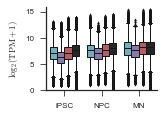

In [31]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.boxplot(y='expression_mean_log2_plus1', data=modalities_expression, linewidth=1, fliersize=3, **plot_kws)
ax.legend_.set_visible(False)
sns.despine()
ax.set(xlabel='', ylabel='$\log_{2}(\mathrm{TPM} + 1)$', ylim=(0, 16))
ax.locator_params('y', nbins=4)
fig.savefig('{}/expression.pdf'.format(figure_folder))

In [32]:
modalities_expression_phenotype_mean = modalities_expression.groupby(
    ['phenotype', 'modality', 'common_id'])['log2(TPM+1)'].mean()
modalities_expression_phenotype_mean = modalities_expression_phenotype_mean.reset_index()
modalities_expression_phenotype_mean = modalities_expression_phenotype_mean.rename(columns={'log2(TPM+1)': 'mean(log2(TPM+1))'})
modalities_expression_phenotype_mean.head()

,phenotype,modality,common_id,mean(log2(TPM+1))
0,MN,ambivalent,ENSG00000092841,11.143128
1,MN,bimodal,ENSG00000005483,7.711536
2,MN,bimodal,ENSG00000008294,8.044015
3,MN,bimodal,ENSG00000009307,8.620661
4,MN,bimodal,ENSG00000010244,8.391159


In [33]:
modalities_expression_phenotype_var = modalities_expression.groupby(
    ['phenotype', 'modality', 'common_id'])['log2(TPM+1)'].var()
modalities_expression_phenotype_var.name = 'var(log2(TPM+1))'
modalities_expression_phenotype_var.head()

phenotype  modality    common_id      
MN         ambivalent  ENSG00000092841    0.959718
           bimodal     ENSG00000005483    2.025298
                       ENSG00000008294    2.184252
                       ENSG00000009307    1.959440
                       ENSG00000010244    2.847479
Name: var(log2(TPM+1)), dtype: float64

In [34]:
modalities_expresion_phenotype = modalities_expression_phenotype_mean.join(
    modalities_expression_phenotype_var, on=['phenotype', 'modality', 'common_id'])
modalities_expresion_phenotype.head()

,phenotype,modality,common_id,mean(log2(TPM+1)),var(log2(TPM+1))
0,MN,ambivalent,ENSG00000092841,11.143128,0.959718
1,MN,bimodal,ENSG00000005483,7.711536,2.025298
2,MN,bimodal,ENSG00000008294,8.044015,2.184252
3,MN,bimodal,ENSG00000009307,8.620661,1.959440
4,MN,bimodal,ENSG00000010244,8.391159,2.847479


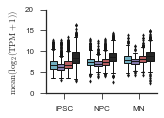

In [35]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.boxplot(y='mean(log2(TPM+1))', data=modalities_expresion_phenotype, linewidth=1, fliersize=3, **plot_kws)
ax.legend_.set_visible(False)
sns.despine()
ax.set(xlabel='', ylabel=r'$\mathrm{mean}\left(\log_{2}(\mathrm{TPM} + 1)\right)$')
ax.locator_params('y', nbins=4)
fig.savefig('{}/expression_mean_within_phenotype.pdf'.format(figure_folder))

In [61]:
from scipy.stats.mstats import kruskalwallis

col = 'mean(log2(TPM+1))'

lines = []

for phenotype, phenotype_df in modalities_expresion_phenotype.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
    constitutive = grouped.get_group('constitutive')
    
    for modality, modality_df in grouped:
        if modality == 'constitutive':
            continue
#         six.print_('\t', modality)

        result = kruskalwallis(modality_df[col], constitutive[col])
#         six.print_('\t\t', result)
        lines.append([phenotype, modality, result[0], result[1]])
expression_significance = pd.DataFrame(lines, columns=['phenotype', 'modality', 'statistic', 'p-value'])
expression_significance['q-value'] = expression_significance['p-value'] * expression_significance.shape[0]
expression_significance.loc[expression_significance['q-value'] < 1e-3]

MN
NPC
iPSC


,phenotype,modality,statistic,p-value,q-value
1,MN,bimodal,173.170405,1.502293e-39,1.952982e-38
2,MN,excluded,80.563981,2.814430e-19,3.658759e-18
3,MN,included,118.207657,1.561533e-27,2.029993e-26
5,NPC,bimodal,474.322554,3.674164e-105,4.776413e-104
6,NPC,excluded,311.660983,9.492788e-70,1.234062e-68
7,NPC,included,404.442084,5.942402e-90,7.725122e-89
9,iPSC,bimodal,820.696644,1.707298e-180,2.219487e-179
11,iPSC,excluded,477.475176,7.570815e-106,9.842059e-105
12,iPSC,included,682.811014,1.635416e-150,2.126041e-149


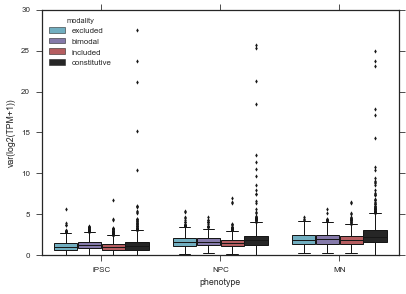

In [37]:
sns.boxplot(y='var(log2(TPM+1))', data=modalities_expresion_phenotype, linewidth=1, fliersize=3, **plot_kws)


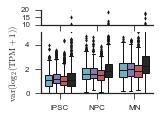

In [38]:
fig, axes = plt.subplots(figsize=(2, 1.5), nrows=2, gridspec_kw=dict(height_ratios=(0.2, 0.8), hspace=0.2))
ax = axes[0]
sns.boxplot(y='var(log2(TPM+1))', data=modalities_expresion_phenotype, linewidth=1, fliersize=3, ax=ax, **plot_kws)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
# sns.despine(ax=ax, bottom=True)
ax.set(ylim=(10, 20), ylabel='')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

ax = axes[1]
sns.boxplot(y='var(log2(TPM+1))', data=modalities_expresion_phenotype, linewidth=1, fliersize=3, ax=ax, **plot_kws)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine()

ax.set(xlabel='', ylabel=r'$\mathrm{var}\left(\log_{2}(\mathrm{TPM} + 1)\right)$', ylim=(0, 5))

fig.savefig('{}/expression_var_within_phenotype.pdf'.format(figure_folder))

## Exon splice site scores

In [39]:
prefix = 'maxentscan'
csv = '{}.csv'.format(prefix)

In [40]:
constitutive_maxentscan = pd.read_csv('{}/{}'.format(constitutive_feature_folder, csv), index_col=0)
constitutive_maxentscan.index.name = 'event_id'
constitutive_maxentscan.head()

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
event_id,,,,
exon:chr10:102039881-102039985:-,8.01,GTTTTTCTTTGTTTTTAAAGATG,3.95,TGGGTAACC
exon:chr10:102040691-102040810:-,5.71,TCTTCTGTTTAATTTTCAAGCCA,8.62,AATGTAAGT
exon:chr10:102045854-102045970:-,5.19,GTCATTCTCCCTTGGCCCAGACG,8.48,CGGGTGAGG
exon:chr10:102286732-102286831:-,9.47,AAGTTCTTGCTGTCTTTCAGGTA,10.10,CCGGTAAGA
exon:chr10:102289123-102289263:-,8.05,TGTTCTCTTCTGCGTTCTAGCCT,7.47,AGGGTATGC


In [41]:
score_cols = constitutive_maxentscan.describe().columns
constitutive_maxentscan.describe()

,splice_site_3p_score,splice_site_5p_score
count,5893.000000,5893.000000
mean,7.990557,8.108286
std,3.712458,3.148625
min,-32.040000,-31.740000
25%,6.720000,7.390000
50%,8.500000,8.780000
75%,10.130000,9.880000
max,14.850000,11.810000


In [42]:
constitutive_maxentscan.loc[(constitutive_maxentscan[score_cols] < 0).any(axis=1)]

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
event_id,,,,
exon:chr10:112359412-112359570:+,-0.42,AAATGGATAATGTCATATAGCAA,10.86,CAGGTAAGT
exon:chr10:126092367-126092489:-,9.83,TATTCCTGTTTCTTCTGTAGCGT,-1.28,CAGGTTGTC
exon:chr10:133786538-133786622:-,-1.37,ATTCTATTCACATCGCCAAGCCC,9.88,CAGGTAAGC
exon:chr10:33218769-33218972:-,4.60,ATATTTTATATGTCATTTAGACA,-7.95,TTGGTTTTG
exon:chr10:33221434-33221528:-,11.35,TTCTTTCTTCTTTCTGACAGATG,-0.35,AAGGTTGCT
exon:chr10:92655637-92655674:+,7.34,CTTTGTTCATTTTATTTCAGCCT,-4.71,TCTGTATCC
exon:chr11:10821099-10821156:-,-0.17,CATATATAAATGGATTAAAGATA,9.14,TAGGTAAGA
exon:chr11:10827454-10827487:-,-5.09,CAACTCCGCAAACGAAAAAGAAC,10.45,AGGGTAAGT
exon:chr11:10827454-10827557:-,-4.32,CCCCAGGGCAAAACGCTCAGAAA,10.45,AGGGTAAGT


In [43]:
constitutive_maxentscan_modalities = make_phenotype_modality_format(constitutive_maxentscan)
constitutive_maxentscan_modalities.head()

(17679, 7)


,event_id,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,modality,phenotype
0,exon:chr10:102039881-102039985:-,8.01,GTTTTTCTTTGTTTTTAAAGATG,3.95,TGGGTAACC,constitutive,iPSC
1,exon:chr10:102040691-102040810:-,5.71,TCTTCTGTTTAATTTTCAAGCCA,8.62,AATGTAAGT,constitutive,iPSC
2,exon:chr10:102045854-102045970:-,5.19,GTCATTCTCCCTTGGCCCAGACG,8.48,CGGGTGAGG,constitutive,iPSC
3,exon:chr10:102286732-102286831:-,9.47,AAGTTCTTGCTGTCTTTCAGGTA,10.10,CCGGTAAGA,constitutive,iPSC
4,exon:chr10:102289123-102289263:-,8.05,TGTTCTCTTCTGCGTTCTAGCCT,7.47,AGGGTATGC,constitutive,iPSC


In [44]:
constitutive_maxentscan.loc[(constitutive_maxentscan[score_cols] < 0).all(axis=1)]

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
event_id,,,,
exon:chr15:66795029-66795088:-,-2.26,ATTCTTGACTGGAAAAATAGATG,-5.89,AGAGTGAAC
exon:chr7:87839398-87839445:-,-2.20,AATCCTTGATTACAGTTCAGAGA,-19.00,TGGGCTGTA


In [45]:
alternative_maxentscan = pd.read_csv('{}/{}'.format(alternative_feature_folder, csv), index_col=0)
alternative_maxentscan.index.name = 'event_id'
alternative_maxentscan.head()

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
event_id,,,,
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,7.84,TCTGTGTGCTGCTTCTTCAGTGC,10.28,CAGGTAGGT
exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102003455-102003534:-@exon:chr10:101997940-101997988:-,6.56,GTCTCTCAAATATGTTGTAGAAA,9.06,AAGGTAAAG
exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,8.84,TGGGTAAGC
exon:chr10:102021736-102021820:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,8.47,ATGTCTGTTTCCCTCACTAGCTC,8.84,TGGGTAAGC
exon:chr10:102021736-102021820:-@exon:chr10:102020723-102020785:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,7.14,TTAGCTGCTGTTGTGTGTAGGAA,7.98,AAGGTATAG


In [46]:
modalities_maxentscan = study.supplemental.modalities_tidy.join(alternative_maxentscan, on='event_id')
modalities_maxentscan = pd.concat([modalities_maxentscan, constitutive_maxentscan_modalities])
modalities_maxentscan.tail()

,event_id,modality,phenotype,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
5888,exon:chrX:80532483-80532668:+,constitutive,MN,8.56,TTCTTGTCCTTTGGTCCTAGATT,7.83,GGGGTAAGA
5889,exon:chrX:80533830-80533910:+,constitutive,MN,7.00,CTTATCTTCTTTTCATCAAGGAC,9.11,AAGGTATGA
5890,exon:chrX:99887482-99887565:-,constitutive,MN,11.13,TGTTTTTTTCCTCCCATTAGGGT,10.08,CAAGTAAGT
5891,exon:chrX:99890175-99890249:-,constitutive,MN,10.90,CTTTCTTTCTTATCCTGCAGTAT,9.85,GAGGTAAGC
5892,exon:chrX:99890555-99890743:-,constitutive,MN,6.84,TTCTCTGAATTCCCACATAGATC,10.10,CTGGTGAGT


In [47]:
score_cols

Index([u'splice_site_3p_score', u'splice_site_5p_score'], dtype='object')

In [48]:
modalities_maxentscan.head()

,event_id,modality,phenotype,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,7.55,TGTCTGGTCTGTCAATGTAGGTA,10.24,TGGGTAAGT
1,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,MN,9.49,TATTTGTCTTTCTGCCTCAGATG,8.95,GTGGTGAGT
2,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,MN,5.57,TGCTTGCTGCTTTTCTAAAGGCG,9.81,GAGGTATGT
3,exon:chr10:103563492-103563776:-@exon:chr10:10...,bimodal,MN,10.31,TTTTATTTTATTTTTTGCAGCTG,7.39,GCAGTGAGT
4,exon:chr10:103567487-103567658:-@exon:chr10:10...,included,MN,9.11,ACTTTTCTCCCTACATTTAGAAT,10.86,CAGGTAAGT


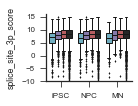

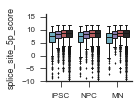

In [49]:
for col in score_cols:

    fig, ax = plt.subplots(figsize=(2, 1.5))
    sns.boxplot(data=modalities_maxentscan, y=col, linewidth=1, fliersize=2, **plot_kws)
    ax.set(ylim=(-10, 16), xlabel='')
    ax.legend_.set_visible(False)
    sns.despine()
    fig.tight_layout()
    fig.savefig('{}/{}.pdf'.format(figure_folder, col))

In [58]:
from scipy.stats.mstats import kruskalwallis

lines = []

for col in score_cols:
#     six.print_('--- {} ---'.format(col))
    for phenotype, phenotype_df in modalities_maxentscan.groupby(['phenotype']):
#         six.print_(phenotype)
        grouped = phenotype_df.groupby('modality')
        constitutive = grouped.get_group('constitutive')

        for modality, modality_df in grouped:
            if modality == 'constitutive':
                continue
#             six.print_('\t', modality)

            result = kruskalwallis(modality_df[col], constitutive[col])
#             six.print_('\t\t', result)
            lines.append([phenotype, col, modality, result[0], result[1]])
splice_site_significance = pd.DataFrame(lines, columns=['phenotype', 'splice_site', 'modality', 'statistic', 'p-value'])
splice_site_significance['q-value'] = splice_site_significance['p-value'] * splice_site_significance.shape[0]
splice_site_significance.loc[splice_site_significance['q-value'] < 1e-3]

,phenotype,splice_site,modality,statistic,p-value,q-value
2,MN,splice_site_3p_score,excluded,140.129013,2.494605e-32,6.485972e-31
5,NPC,splice_site_3p_score,bimodal,19.800615,8.595502e-06,2.234831e-04
6,NPC,splice_site_3p_score,excluded,257.164435,7.122203e-58,1.851773e-56
11,iPSC,splice_site_3p_score,excluded,301.584784,1.487659e-67,3.867913e-66
15,MN,splice_site_5p_score,excluded,169.379373,1.010925e-38,2.628405e-37
18,NPC,splice_site_5p_score,bimodal,36.532088,1.501736e-09,3.904514e-08
19,NPC,splice_site_5p_score,excluded,247.572569,8.783177e-56,2.283626e-54
22,iPSC,splice_site_5p_score,bimodal,52.981524,3.367006e-13,8.754217e-12
24,iPSC,splice_site_5p_score,excluded,340.189857,5.801272e-76,1.508331e-74


In [51]:
modalities_maxentscan['splice_site_3p_seq_2bp'] = modalities_maxentscan['splice_site_3p_seq'].str[-5:-3]
modalities_maxentscan['splice_site_5p_seq_2bp'] = modalities_maxentscan['splice_site_5p_seq'].str[3:5]
modalities_maxentscan

,event_id,modality,phenotype,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,splice_site_3p_seq_2bp,splice_site_5p_seq_2bp
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,7.55,TGTCTGGTCTGTCAATGTAGGTA,10.24,TGGGTAAGT,AG,GT
1,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,MN,9.49,TATTTGTCTTTCTGCCTCAGATG,8.95,GTGGTGAGT,AG,GT
2,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,MN,5.57,TGCTTGCTGCTTTTCTAAAGGCG,9.81,GAGGTATGT,AG,GT
3,exon:chr10:103563492-103563776:-@exon:chr10:10...,bimodal,MN,10.31,TTTTATTTTATTTTTTGCAGCTG,7.39,GCAGTGAGT,AG,GT
4,exon:chr10:103567487-103567658:-@exon:chr10:10...,included,MN,9.11,ACTTTTCTCCCTACATTTAGAAT,10.86,CAGGTAAGT,AG,GT
5,exon:chr10:104192283-104192418:-@exon:chr10:10...,included,MN,10.74,TCCTGTCTGTGTCCCTTCAGAAG,7.10,CAGGTAGAG,AG,GT
6,exon:chr10:1042046-1043248:+@exon:chr10:104494...,included,MN,7.66,AAAGTTCTCACTTGTTCCAGGTG,9.22,CAGGTGAGA,AG,GT
7,exon:chr10:104209950-104210087:+@exon:chr10:10...,bimodal,MN,7.12,CACTCACTTGTCTCCTTCAGCCT,7.23,TGGGTGAGC,AG,GT
8,exon:chr10:104241758-104241932:-@exon:chr10:10...,included,MN,11.60,TCTCCTCTTTGCCCATTCAGGTT,6.45,AGGGTAGGA,AG,GT
9,exon:chr10:104243917-104244133:-@exon:chr10:10...,included,MN,6.71,TGTCTTGCTTGGATCTGCAGAGA,9.65,GAGGTAGGT,AG,GT


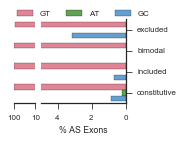

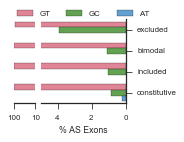

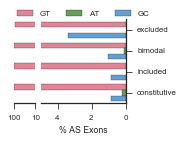

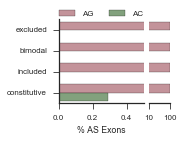

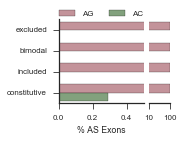

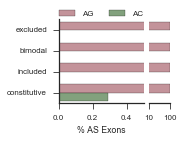

In [52]:
splice_site_seq_cols = 'splice_site_5p_seq_2bp', 'splice_site_3p_seq_2bp'

for col in splice_site_seq_cols:
    modalities_splice_sites = modalities_maxentscan.groupby(['phenotype', 'modality', col]).size()
    modalities_splice_sites = modalities_splice_sites.reset_index()
    modalities_splice_sites = modalities_splice_sites.rename(columns={0:'counts'})
    modalities_splice_sites['% AS Exons'] = 100 *modalities_splice_sites.groupby(
        ['phenotype', 'modality'])['counts'].apply(lambda x: x/x.sum())
    
    saturation = 0.8 if col == 'splice_site_5p_seq_2bp' else 0.4
    
    palette = sns.husl_palette(s=saturation, n_colors=3)
    
    for phenotype, phenotype_df in modalities_splice_sites.groupby('phenotype'):
        width_ratios = (0.2, 0.8) if col == 'splice_site_5p_seq_2bp' else (0.8, 0.2)
        fig, axes = plt.subplots(figsize=(2, 1.5), ncols=2, 
                                 gridspec_kw=dict(width_ratios=width_ratios, wspace=0.1))
        ax = axes[0]
        sns.barplot(data=phenotype_df, x='% AS Exons', ax=ax, ci=False, 
                    y='modality', hue=col, order=modality_order, palette=palette)
        ax.legend_.set_visible(False)
        ax.locator_params('x', nbins=4)
#         ax.xaxis.set_tick_params('off')
        if col == 'splice_site_5p_seq_2bp':
            ax.set(xlim=(10, 100), ylabel='', yticks=[], xlabel='', xticks=[10, 100])
            ax.invert_xaxis()
            sns.despine(ax=ax, left=True)

        else:
            ax.set(xlim=(0, 0.5), ylabel='', xlabel='% AS Exons')
            sns.despine(ax=ax)
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)


        ax = axes[1]
        sns.barplot(data=phenotype_df, x='% AS Exons', ax=ax, ci=False, y='modality', 
                    order=modality_order, hue=col, orient='h', palette=palette)
        ax.locator_params('x', nbins=4)
        ax.legend_.set_visible(False)

        if col == 'splice_site_5p_seq_2bp':
            # Somehow these "put the y-axis ticks on the right" functions 
            # only work in combination
            ax.yaxis.tick_right()
            ax.set(xlim=(0, 5), ylabel='', xlabel='% AS Exons')
            ax.invert_xaxis()
            ax.yaxis.set_ticks_position('right')
            sns.despine(ax=ax, left=True, right=False)
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)
        else:
            ax.set(xlim=(10, 100), ylabel='', yticks=[], xlabel='', xticks=[10, 100])
            sns.despine(ax=ax, left=True)

#         legend_fig, legend_ax = plt.subplots(figsize=(0.5, 0.5))
#         legend_ax.legend(*ax.get_legend_handles_labels())

        fig.savefig('{}/{}_{}_barplot.pdf'.format(figure_folder, col, phenotype))

In [53]:
modalities_splice_sites = modalities_maxentscan.groupby(['phenotype', 'modality', col]).size()
modalities_splice_sites = modalities_splice_sites.reset_index()
modalities_splice_sites = modalities_splice_sites.rename(columns={0:'counts'})
modalities_splice_sites['% AS Exons'] = 100 *modalities_splice_sites.groupby(
    ['phenotype', 'modality'])['counts'].apply(lambda x: x/x.sum())

modalities_splice_sites.head()

,phenotype,modality,splice_site_3p_seq_2bp,counts,% AS Exons
0,MN,ambivalent,AG,1,100.000000
1,MN,bimodal,AG,356,100.000000
2,MN,constitutive,AC,17,0.288478
3,MN,constitutive,AG,5876,99.711522
4,MN,excluded,AG,541,100.000000


In [54]:
modalities_splice_sites

,phenotype,modality,splice_site_3p_seq_2bp,counts,% AS Exons
0,MN,ambivalent,AG,1,100.000000
1,MN,bimodal,AG,356,100.000000
2,MN,constitutive,AC,17,0.288478
3,MN,constitutive,AG,5876,99.711522
4,MN,excluded,AG,541,100.000000
5,MN,included,AG,1553,100.000000
6,NPC,ambivalent,AG,3,100.000000
7,NPC,bimodal,AG,751,100.000000
8,NPC,constitutive,AC,17,0.288478
9,NPC,constitutive,AG,5876,99.711522


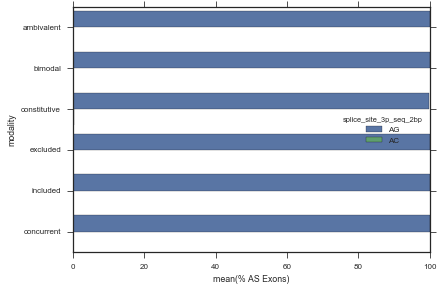

In [55]:
sns.barplot(y='modality', x='% AS Exons', data=modalities_splice_sites, hue=col, orient='h')

In [56]:
modalities_splice_sites

,phenotype,modality,splice_site_3p_seq_2bp,counts,% AS Exons
0,MN,ambivalent,AG,1,100.000000
1,MN,bimodal,AG,356,100.000000
2,MN,constitutive,AC,17,0.288478
3,MN,constitutive,AG,5876,99.711522
4,MN,excluded,AG,541,100.000000
5,MN,included,AG,1553,100.000000
6,NPC,ambivalent,AG,3,100.000000
7,NPC,bimodal,AG,751,100.000000
8,NPC,constitutive,AC,17,0.288478
9,NPC,constitutive,AG,5876,99.711522


In [62]:
ls /projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/splicing_feature_data/alternative/

downstream400_placental_mammal_conservation.csv
exon2_merkin2012_ancient.csv
exon2_phastcons_placental_mammal.bed
exon2_phastcons_placental_mammal.txt
exons.bed
exons.fasta
exons_merkin2012_ancient_alt_exons.bed
exons_phastcons_placental_mammal.bed
exons_phastcons_placental_mammal.txt
exons_stop_plus1.bed
gc_content.csv
genes_expanded.csv
isoform_translations.fa
maxentscan.csv
nucleotide_content/
phastcons_placental_mammal.txt@
repetitive_element_overlap.csv
upstream400_placental_mammal_conservation.csv


In [69]:
event_to_gene = pd.read_csv(
    '/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/splicing_feature_data/alternative/genes_expanded.csv',
    header=None, squeeze=True, index_col=0)
event_to_gene.name = 'ensembl_id'
event_to_gene.head()

0
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-    ENSG00000107521
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-    ENSG00000107521
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-    ENSG00000107521
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-    ENSG00000120053
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+    ENSG00000198018
Name: ensembl_id, dtype: object

In [71]:
modalities_genes = study.supplemental.modalities_tidy.join(event_to_gene, on='event_id')
modalities_genes.head()

,phenotype,event_id,modality,ensembl_id
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,ENSG00000099194
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,ENSG00000255339
2,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,ENSG00000166171
3,MN,exon:chr10:103563492-103563776:-@exon:chr10:10...,bimodal,ENSG00000198408
4,MN,exon:chr10:103567487-103567658:-@exon:chr10:10...,included,ENSG00000198408


In [72]:
modalities_genes = modalities_genes.join(study.expression.feature_data, on='ensembl_id')
modalities_genes.head()

,phenotype,event_id,modality,ensembl_id,biomark_neural_panel,confident_rbp,gencode_id,gene_name,gene_status,gene_type,...,gerstberger2014_rbp_target_diverse,gerstberger2014_rbp_family_targets,cell_surface_markers,gerstberger2014_tf,cell_cycle,domazetloso2008_phylostratum,bioguo_animaltfdb_tf,bioguo_animaltfdb_chromatin_remodeler,bioguo_animaltfdb_cofactor,max_exons_per_gene
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,ENSG00000099194,False,False,ENSG00000099194.5,SCD,KNOWN,protein_coding,...,False,NaN,False,False,False,1,False,False,False,6
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,ENSG00000255339,False,False,ENSG00000255339.2,NDUFB8,NOVEL,protein_coding,...,False,NaN,False,False,False,NaN,False,False,False,12
2,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,ENSG00000166171,False,False,ENSG00000166171.8,DPCD,KNOWN,protein_coding,...,False,NaN,False,False,False,2,False,False,False,7
3,MN,exon:chr10:103563492-103563776:-@exon:chr10:10...,bimodal,ENSG00000198408,False,False,ENSG00000198408.9,MGEA5,KNOWN,protein_coding,...,False,NaN,False,False,False,1,False,False,False,16
4,MN,exon:chr10:103567487-103567658:-@exon:chr10:10...,included,ENSG00000198408,False,False,ENSG00000198408.9,MGEA5,KNOWN,protein_coding,...,False,NaN,False,False,False,1,False,False,False,16


In [73]:
modalities_genes.columns

Index([u'phenotype', u'event_id', u'modality', u'ensembl_id',
       u'biomark_neural_panel', u'confident_rbp', u'gencode_id', u'gene_name',
       u'gene_status', u'gene_type', u'havana_gene', u'level', u'rbp',
       u'ribosomal', u'ribosomal_subunit', u'synapse', u'tag',
       u'transcript_id', u'transcript_name', u'transcript_status',
       u'transcript_type', u'transcription_factor', u'gerstberger2014_rbp',
       u'gerstberger2014_rbp_domains[count]',
       u'gerstberger2014_rbp_consensus_rna_target',
       u'gerstberger2014_rbp_parologous_family_id',
       u'gerstberger2014_rbp_target_mrna',
       u'gerstberger2014_rbp_target_ribosome',
       u'gerstberger2014_rbp_target_trna', u'gerstberger2014_rbp_target_ncrna',
       u'gerstberger2014_rbp_target_diverse',
       u'gerstberger2014_rbp_family_targets', u'cell_surface_markers',
       u'gerstberger2014_tf', u'cell_cycle', u'domazetloso2008_phylostratum',
       u'bioguo_animaltfdb_tf', u'bioguo_animaltfdb_chromatin_remod

In [77]:
modalities_genes = modalities_genes.convert_objects()
modalities_genes.dtypes

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


phenotype                                    object
event_id                                     object
modality                                     object
ensembl_id                                   object
biomark_neural_panel                           bool
confident_rbp                                  bool
gencode_id                                   object
gene_name                                    object
gene_status                                  object
gene_type                                    object
havana_gene                                  object
level                                         int64
rbp                                            bool
ribosomal                                      bool
ribosomal_subunit                              bool
synapse                                        bool
tag                                          object
transcript_id                                object
transcript_name                              object
transcript_s

In [78]:
boolean_cols = modalities_genes.columns[modalities_genes.dtypes == bool]

In [80]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE

In [82]:
figure_folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/gene_transcript_features'

In [83]:

boolean_folder = '{}/boolean'.format(figure_folder)
!mkdir $boolean_folder

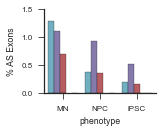

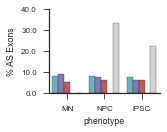

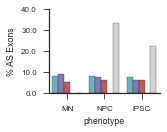

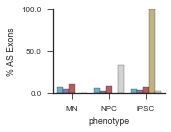

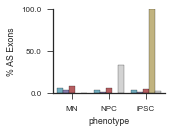

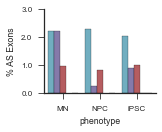

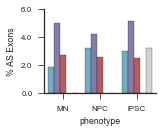

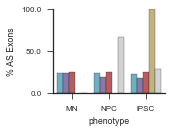

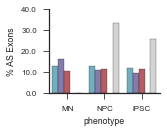

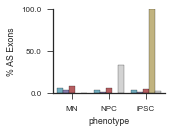

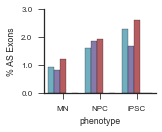

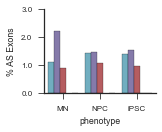

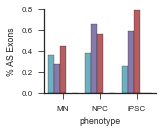

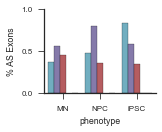

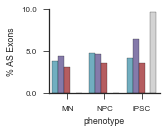

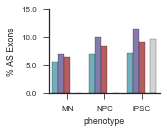

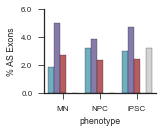

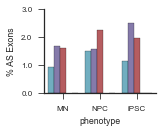

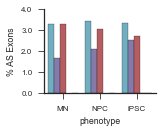

In [87]:
for col in boolean_cols:
    fig, ax = plt.subplots(figsize=(2, 1.5))
    sns.barplot(x='phenotype', hue='modality', hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, data=modalities_genes,
               y=col, ci=None)
    ax.locator_params('y', nbins=4)
    yticks = ax.get_yticks()
    yticklabels = 100 * yticks
    ax.set(ylabel='% AS Exons', yticklabels=yticklabels)
    ax.legend_.set_visible(False)
    sns.despine()
    fig.savefig('{}/{}.pdf'.format(boolean_folder, col))

In [94]:
from scipy.stats import hypergeom

lines = []

for col in boolean_cols:
    for phenotype, phenotype_df in modalities_genes.groupby(['phenotype']):
#         six.print_(phenotype)
        M = phenotype_df.shape[0]
        n = phenotype_df[col].sum()
        for modality, modality_df in phenotype_df.groupby('modality'):
#             six.print_('\t', modality)
            N = modality_df.shape[0]
            x = modality_df[col].sum()
            p_value = hypergeom.sf(x, M, n, N)
#             six.print_('\t\t', result)
            lines.append([col, phenotype, modality, p_value])
            
boolean_feature_significance = pd.DataFrame(lines, columns=['feature', 'phenotype', 'modality', 'p-value'])
boolean_feature_significance['q-value'] = boolean_feature_significance['p-value'] * boolean_feature_significance.shape[0]
boolean_feature_significance.loc[boolean_feature_significance['q-value'] < 1e-3]

,feature,phenotype,modality,p-value,q-value
46,ribosomal,NPC,included,8.232122e-09,0.000002
49,ribosomal,iPSC,concurrent,0.000000e+00,0.000000
51,ribosomal,iPSC,included,2.445066e-08,0.000006
59,ribosomal_subunit,NPC,included,5.470122e-07,0.000135
62,ribosomal_subunit,iPSC,concurrent,0.000000e+00,0.000000
64,ribosomal_subunit,iPSC,included,3.371135e-06,0.000833
87,transcription_factor,iPSC,bimodal,1.970645e-06,0.000487
101,gerstberger2014_rbp,iPSC,concurrent,0.000000e+00,0.000000
103,gerstberger2014_rbp,iPSC,included,3.445620e-06,0.000851
124,gerstberger2014_rbp_target_ribosome,NPC,included,1.000758e-06,0.000247


In [98]:
boolean_feature_significance.loc[boolean_feature_significance['p-value'] < 1e-3]

,feature,phenotype,modality,p-value,q-value
21,confident_rbp,iPSC,ambivalent,7.737946e-04,0.191127
34,rbp,iPSC,ambivalent,7.737946e-04,0.191127
42,ribosomal,MN,included,9.376822e-05,0.023161
46,ribosomal,NPC,included,8.232122e-09,0.000002
49,ribosomal,iPSC,concurrent,0.000000e+00,0.000000
51,ribosomal,iPSC,included,2.445066e-08,0.000006
55,ribosomal_subunit,MN,included,3.021585e-04,0.074633
59,ribosomal_subunit,NPC,included,5.470122e-07,0.000135
62,ribosomal_subunit,iPSC,concurrent,0.000000e+00,0.000000
64,ribosomal_subunit,iPSC,included,3.371135e-06,0.000833


In [95]:
x, M, n, N

(126, 7570, 212, 4632)

In [91]:
result

0.0

In [86]:
100 * yticks


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.])